In [1]:
import pandas as pd
import os
import networkx as nx
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import math
import matplotlib as mpl
import scipy
import copy
from sklearn.linear_model import  LinearRegression



import warnings
warnings.filterwarnings("ignore")

In [2]:
def set_fig_style(ax1, xlabel,ylabel,fontsize):
    labelfont  = fontsize
    tickfont   = fontsize
    legendfont = fontsize
    
    ax1.tick_params(axis='both', which='both', direction="in", labelsize=tickfont, pad=8 )
    for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)
    for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)

    ax1.set_xlabel(xlabel, fontsize=labelfont, labelpad=labelfont )
    ax1.set_ylabel(ylabel,fontsize=labelfont, labelpad=labelfont )


    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

In [3]:
def plot_arrivalT_EffD(df,label,path_results):
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

    modelDe = LinearRegression()
    modelDe.fit(np.mat(df['distance']).reshape(-1, 1), np.mat(df['arrival_T']).reshape(-1, 1))
    r2De = modelDe.score(np.mat(df['distance']).reshape(-1, 1), np.mat(df['arrival_T']).reshape(-1, 1))
    print('r2De',r2De)
    predict=modelDe.predict(np.mat(df['distance']).reshape(-1, 1))

    ax.text(0.95, 0.02, r'$R^2= %.2f$' % r2De,
                verticalalignment='bottom', horizontalalignment='right',
                transform=ax.transAxes, fontsize=12)

    ax.scatter(df['distance'],df['arrival_T'],facecolor='#377eb8')

    ax.plot(df['distance'], predict, '-', color='grey',linewidth=2)
    
    set_fig_style(ax, 'Effective Distance','Arrival Time',12)

    ax.set_title(label)

    plt.tight_layout()
    fig.savefig(path_results,dpi=600)

# Load Data and Plot

r2De 0.7526346376721181
r2De 0.7526346376721181


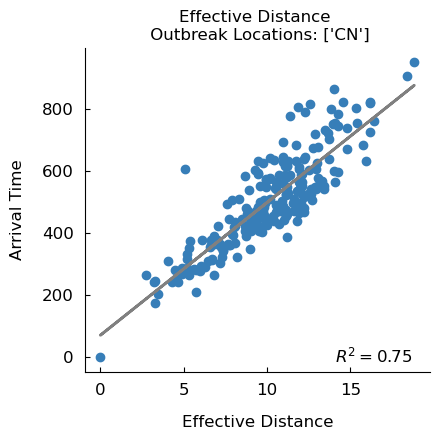

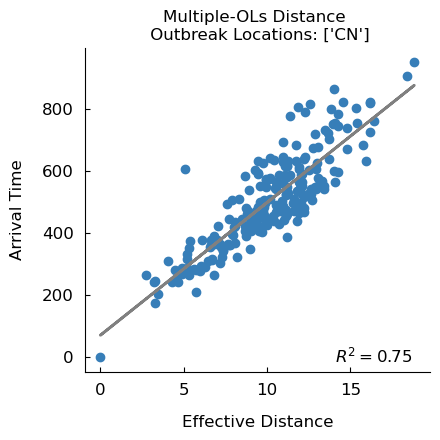

In [9]:
df=pd.read_csv('Effective_Distance_Single_OL.csv')
df['distance']=df['Eff_D']

plot_arrivalT_EffD(df,"Effective Distance \n Outbreak Locations: ['CN']", 'Effective_Distance.png' )

df['distance']=df['Eff_D_multiple']

plot_arrivalT_EffD(df,"Multiple-OLs Distance \n Outbreak Locations: ['CN']", 'Multiple-OLs_Effective_Distance.png' )

r2De 0.6464965967697123
r2De 0.6993973397751063


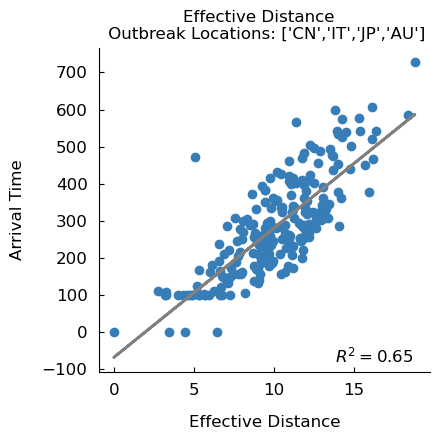

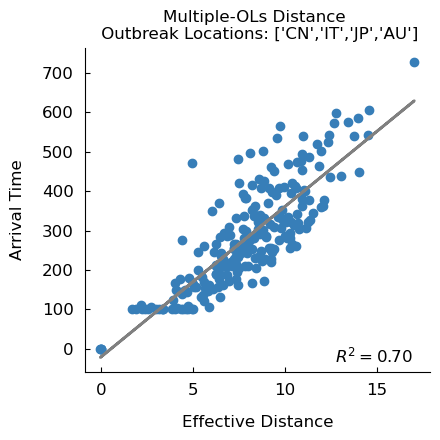

In [11]:
df=pd.read_csv('Effective_Distance_Multiple_OL.csv')
df['distance']=df['Eff_D']

plot_arrivalT_EffD(df,"Effective Distance  \n Outbreak Locations: ['CN','IT','JP','AU']", 'Effective_Distance_mutiple_OL.png' )

df['distance']=df['Eff_D_multiple']

plot_arrivalT_EffD(df,"Multiple-OLs Distance \n Outbreak Locations: ['CN','IT','JP','AU']", 'Multiple-OLs_Effective_Distance_mutiple_OL.png' )